In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import rand

# displays everything as float instead of sci notation
pd.options.display.float_format = '{:.1f}'.format

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_df = ride_df.merge(city_df,how='left', left_on='city', right_on='city')

# Display the data table for preview
ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.8,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.2,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.4,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.4,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.6,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

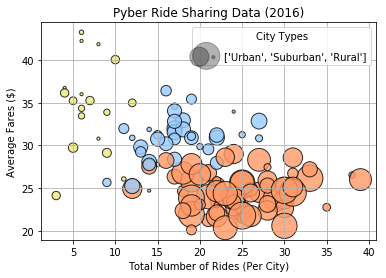

In [19]:
# Obtain the x and y coordinates for each of the three city types
count_df = ride_df.groupby(['city']).count()

avgfare_df = ride_df.groupby(['city']).mean() 

#dealing with colors
type_df = ride_df.groupby(['city','type']).mean() 
type_df = type_df.reset_index(drop=False)
type_df=type_df.replace('Urban','#ff9966')
type_df=type_df.replace('Suburban','#99ccff')
type_df=type_df.replace('Rural','#eaea7c')
type_df

# Build the scatter plots for each city types



x = count_df['ride_id']
y = avgfare_df['fare']
area = 10 * avgfare_df['driver_count']
colors = type_df['type']

                
                
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid(True)

areas= ['Urban', 'Suburban', 'Rural']
plt.scatter([], [], c='k', alpha=0.3, s=area, label=areas)


plt.legend(scatterpoints=3, frameon=True, labelspacing=1, ncol = 2, title='City Types')


plt.scatter(x, y, c=colors, s=area, alpha=0.8, edgecolors = 'black')


# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [8]:
numdrive_df = ride_df[['driver_count','type','city']]
numdrive_df = numdrive_df.groupby('type').sum()
#numdrive = numdrive_df[0:3]/numdrive_df['driver_count'].sum()
#numdrive = numdrive.reset_index(drop=False)
numdrive_df

,driver_count
type,
Rural,537
Suburban,8570
Urban,59602


## Total Fares by City Type

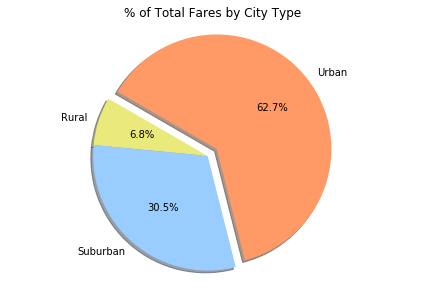

In [9]:
# Calculate Type Percents
numfare_df = ride_df.groupby(['type']).sum() 
rper = numfare_df[0:3]/numfare_df['fare'].sum()
rper= rper.reset_index(drop=False)

# Build Pie Chart
colors = ['#eaea7c','#99ccff','#ff9966']

plt.pie(
rper['fare'], labels=rper['type'], shadow=True, colors = colors,startangle=150, explode=(0,0,0.1), autopct='%.1f%%',
)
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.title('% of Total Fares by City Type')
plt.show()
# Save Figure


## Total Rides by City Type

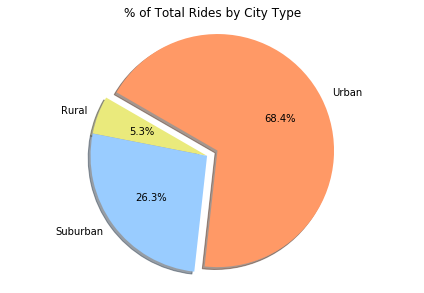

In [10]:
# Calculate Ride Percents
numfare_df = ride_df.groupby(['type']).count() 
perride = numfare_df[0:3]/numfare_df['fare'].sum()
perride= perride.reset_index(drop=False)

# Build Pie Chart
colors = ['#eaea7c','#99ccff','#ff9966']

plt.pie(
perride['fare'], labels=perride['type'], shadow=True, colors = colors,startangle=150, explode=(0,0,0.1), autopct='%.1f%%',
)
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.title('% of Total Rides by City Type')
plt.show()
# Save Figure

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

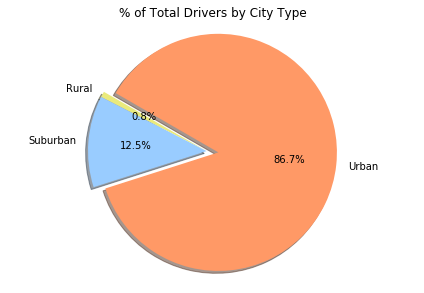

In [11]:
# Calculate Driver Percents
numdrive_df = ride_df[['driver_count','type']]
numdrive_df = numdrive_df.groupby('type').sum()
numdrive = numdrive_df[0:3]/numdrive_df['driver_count'].sum()
numdrive = numdrive.reset_index(drop=False)
# Build Pie Charts
colors = ['#eaea7c','#99ccff','#ff9966']

plt.pie(
numdrive['driver_count'], labels=numdrive['type'], shadow=True, colors = colors,startangle=150, explode=(0,0,0.1), autopct='%.1f%%',
)
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.title('% of Total Drivers by City Type')
plt.show()

